# EXPLORATORAY DATA ANALYSIS ON HOTEL BOOKINGS 

#                          BUSINESS PROBLEM

In recent years, City and Resort hotels have seen high cancellation rates. Each hotel is now dealing with number of problems as a result,including fewer revenues and less than ideal hotel room use. Consequently, lowering cancellation rates in both hotels'primary goalin order to increase their efficiency in generating revenue, and for us to offer through business advice to adress this problem.

The analysis of hotel booking cancellation as well as other factors that have no bearing on their business and yearly revenue generation are the main topics of this report.

# Research Questions

 1-What are the variables that affect hotel reservation cancellations
 
 2-How can we make hotel reservation cancellations better
 
 3- How will hotels be assisted in making prices and promotional decissions

# HYPOTHESIS

1- More cancellations occur when prices are higher.

2- When there is a longer waiting list, customers tend to cancel more frequently.

3- The majority of clients are coming from offline travel agents to make their reservations.

# # EXPLORATORAY DATA ANALYSIS ON HOTEL BOOKINGS 

Importing Necessary Libraries 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
#reading the file into Pandas dataframe

df= pd.read_csv("hotel_booking.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


Data Cleaning

In [7]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [62]:
#here we can see our date column "reservation_status_date" is in object data type so lets change it into datetime format.

df['reservation_status_date']= pd.to_datetime(df["reservation_status_date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119389 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119389 non-null  object        
 1   is_canceled                     119389 non-null  int64         
 2   lead_time                       119389 non-null  int64         
 3   arrival_date_year               119389 non-null  int64         
 4   arrival_date_month              119389 non-null  object        
 5   arrival_date_week_number        119389 non-null  int64         
 6   arrival_date_day_of_month       119389 non-null  int64         
 7   stays_in_weekend_nights         119389 non-null  int64         
 8   stays_in_week_nights            119389 non-null  int64         
 9   adults                          119389 non-null  int64         
 10  children                        119385 non-null  float64

In [17]:
#lets check the missing values in our dataframe

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Here we can see "company" and "agent" columns has high missing values. and columns ["name", "email","phone-number","credit_card"] these columns are personal columns columns so just drop them from our dataframe.

In [18]:
df.drop(["company","agent","name","email","phone-number","credit_card"], axis=1, inplace= True)

In [20]:
df.shape

(119390, 30)

In [21]:
#dropping missing values

df.dropna(inplace= True)

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [22]:
# we can see the statistcal unique values of our categorical (object) columns, lets explore them

df.describe(include= "object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898
unique,2,12,5,177,7,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79302,13852,91863,48586,56402,97730,85601,73863,104163,89174,74745


In [26]:
for col in df.describe(include= "object").columns:
    print(col)
    print(df[col].unique())

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' '

In [27]:
#lets see the statistical summary of our numerical columns.

df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
#we can see in our "adr" average daily rate column there is a outlier.

df= df[df["adr"]<5000]

In [10]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119385.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,103049.000000,6797.000000,119389.000000,119389.000000,119389.000000,119389.000000
mean,0.370411,104.011994,2016.156555,27.165292,15.798164,0.927606,2.500314,1.856402,0.103891,0.007949,0.031912,0.087119,0.137098,0.221118,86.694107,189.266735,2.321169,101.786744,0.062518,0.571368
std,0.482917,106.863358,0.707479,13.605134,8.780826,0.998614,1.908289,0.579263,0.398563,0.097437,0.175768,0.844340,1.497443,0.652304,110.774841,131.655015,17.594793,48.153554,0.245292,0.792800
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.560000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,510.000000,8.000000,5.000000


# Data Analysis & Visualization

In our "is_canceled" column we have the data about cancelled and not cancelled data. so lets just create the diffrent dataframe for each values.


In [12]:
canceled_percentage= df['is_canceled'].value_counts(normalize=True)
canceled_percentage

0    0.629589
1    0.370411
Name: is_canceled, dtype: float64

We can see there is lot of diffrence between cancelled and non cancelled data.

let's see on plot 

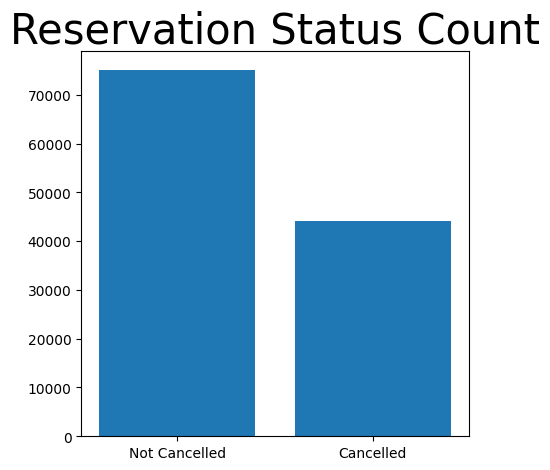

In [15]:
plt.figure(figsize=(5,5))
plt.title('Reservation Status Count',size=30)
plt.bar(['Not Cancelled','Cancelled'],df['is_canceled'].value_counts())
plt.show()

Let's check the Hotels which has more cancellation

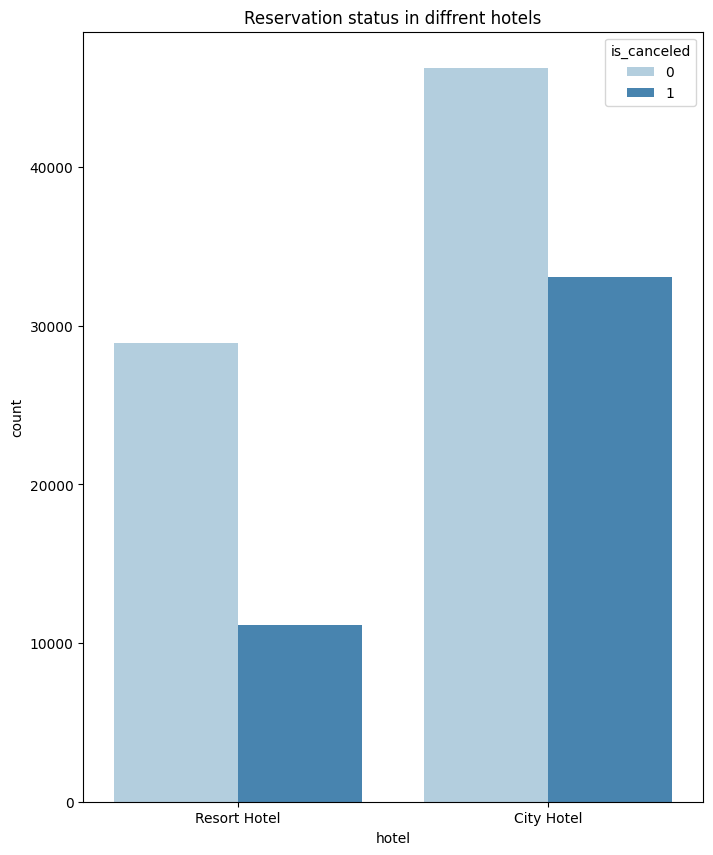

In [17]:
plt.figure(figsize=(8,10))
plt.title("Reservation status in diffrent hotels")
plt.xlabel("Hotels")
plt.ylabel("Number of Reservations")
sns.countplot(x='hotel',hue="is_canceled",data=df,palette='Blues')
plt.show()

Let's check the percentage of cancellation in Hotels.

In [50]:
resort_hotel= df[df['hotel']=='Resort Hotel']
#check the cancellation percentage in resort hotel.

resort_hotel['is_canceled'].value_counts(normalize=True)

0    0.722366
1    0.277634
Name: is_canceled, dtype: float64

Same check for city hotel also.

In [51]:
city_hotel= df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

0    0.582738
1    0.417262
Name: is_canceled, dtype: float64

As we have seen the cancellation percentage in both the hotel types.

lets see if price has any impact on cancellation

In [52]:
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()

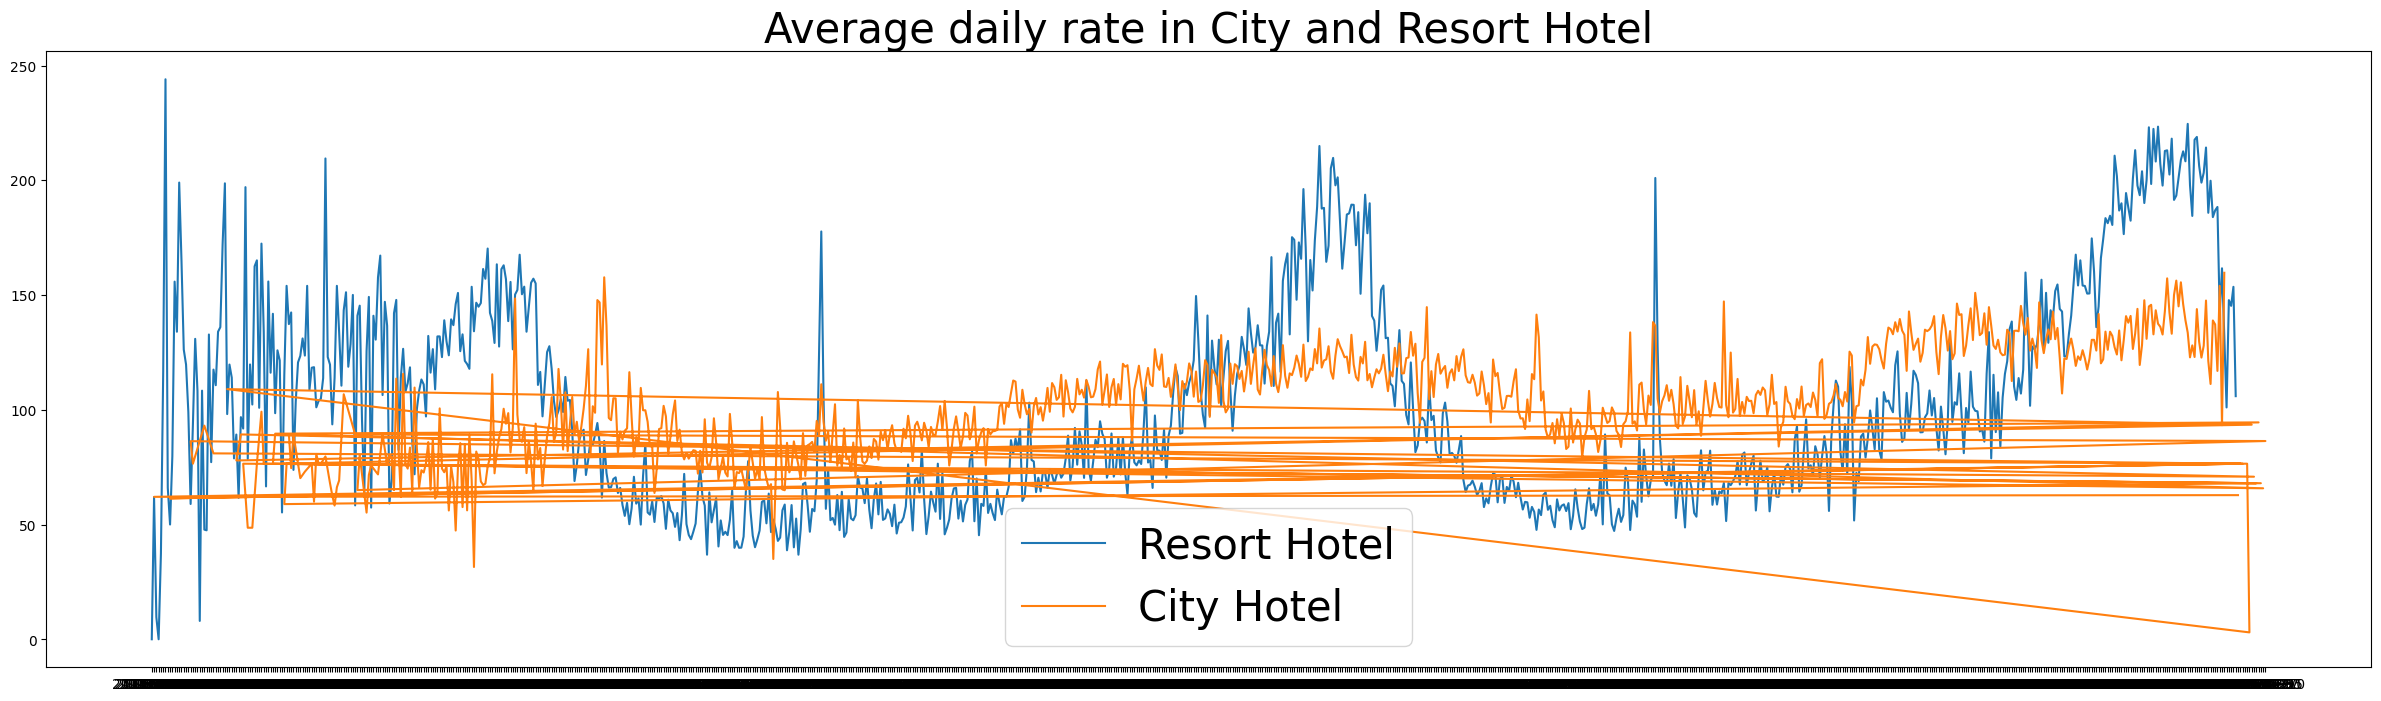

In [60]:
plt.figure(figsize=(30,8))
plt.title("Average daily rate in City and Resort Hotel",size= 30)

plt.plot(resort_hotel.index, resort_hotel['adr'], label='Resort Hotel')

plt.plot(city_hotel.index, city_hotel['adr'], label='City Hotel')
plt.legend(fontsize= 30)
plt.show()

Here We can see the clear spikes of resort hotels, so according to our hypothesis the prices of resort hotels are greater than the prices of city hotels on weekends.

# Now lets see in which month the cancellation is very high.

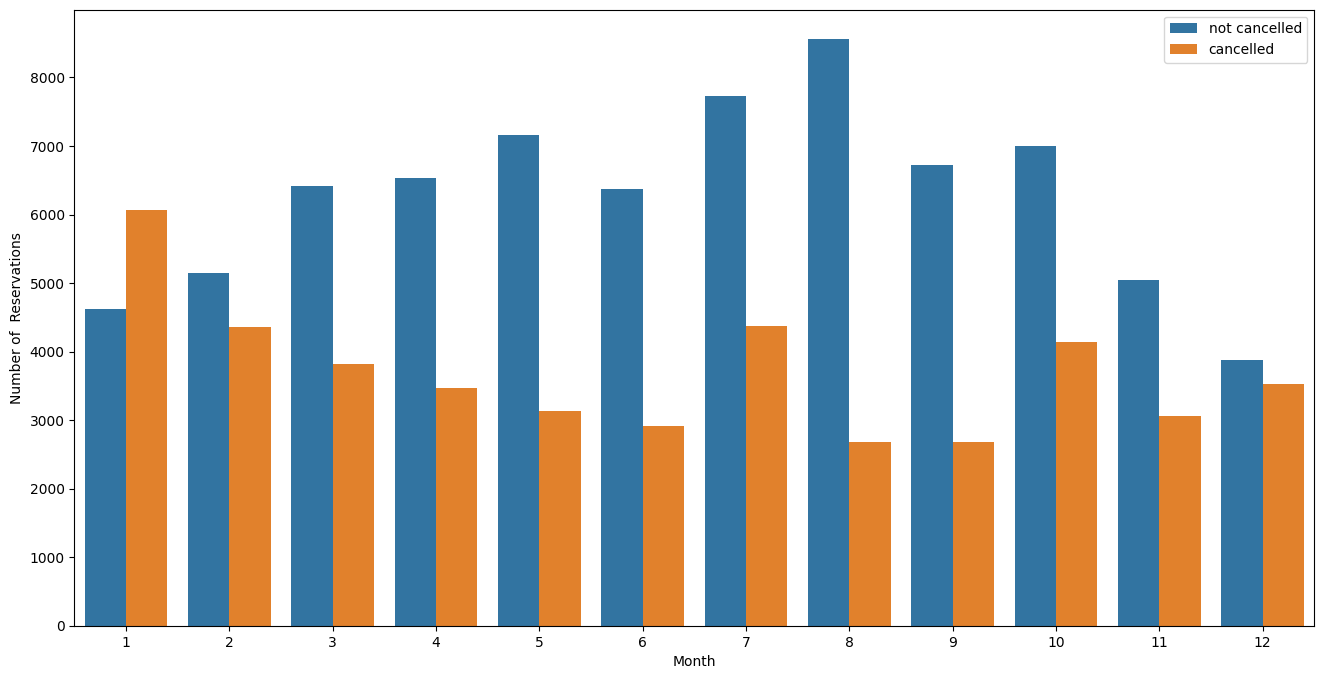

In [63]:
df['month']= df['reservation_status_date'].dt.month

plt.figure(figsize=(16,8))
ax1= sns.countplot(x='month',hue= "is_canceled",data=df)
plt.legend(['not cancelled','cancelled'])
plt.xlabel('Month')
plt.ylabel('Number of  Reservations')
plt.show()

Here we can see Janaury has more cancellation and August has the least cancellation

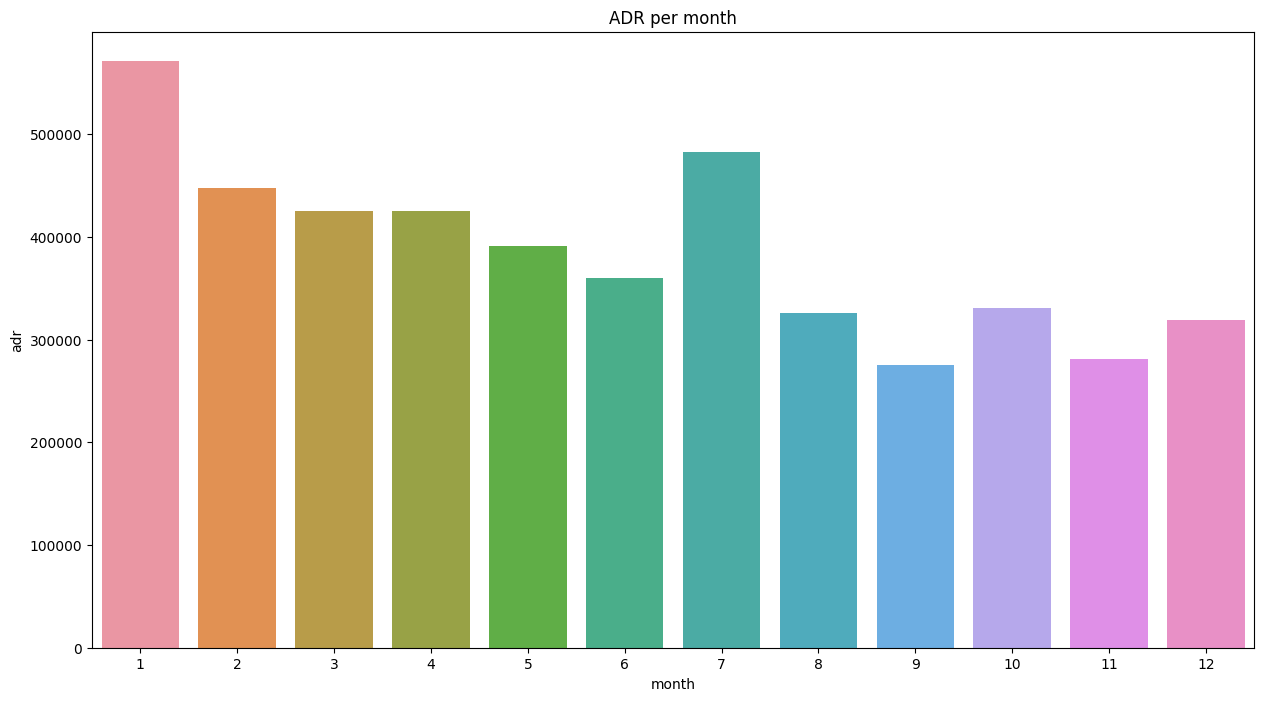

In [68]:
plt.figure(figsize=(15,8))
plt.title('ADR per month')
sns.barplot(x='month',y='adr', data= df[df['is_canceled']==1].groupby('month')['adr'].sum().reset_index())
plt.show()

Here we can see in Janaury month the prices are very higher thats why the cancellation may be higher because of high value or they find some low price hotels.

# Lets check the cancellation on top 10 Countries

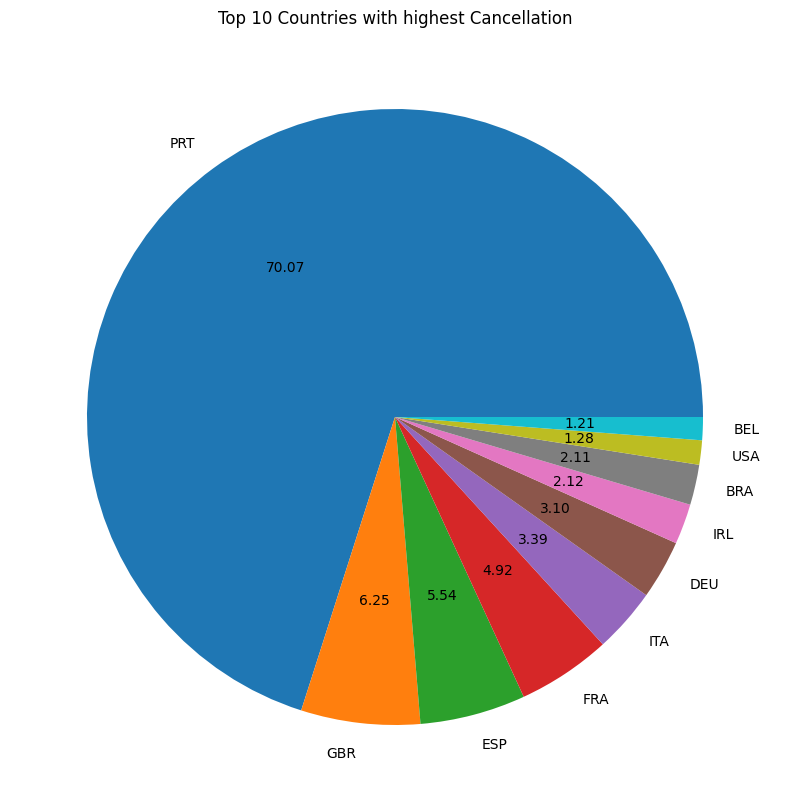

In [71]:
cancelled_data= df[df['is_canceled']==1]
top_10_country= cancelled_data['country'].value_counts()[:10]       # sliced the first 10 coutries

plt.figure(figsize=(10,10))
plt.title("Top 10 Countries with highest Cancellation")

plt.pie(top_10_country,autopct='%.2f',labels=top_10_country.index)
plt.show()


Here we can see Portugal/PRT has the highest cancellation among top 10 countries.

# Now lets see from where our majority customers coming.

In [72]:
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24218
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [73]:
df['market_segment'].value_counts(normalize=True)

Online TA        0.473050
Offline TA/TO    0.202850
Groups           0.165937
Direct           0.105588
Corporate        0.044351
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: market_segment, dtype: float64

# we can see our top customers are coming from online travel agents